# **OLS & Eigenvectors**

This code shows that the hyperplane identified by OLS Method is not requal to any of the eigenvectors of the sample. 

To illustrate imagine the follow this parsimonious example showcased in this code: 

1)you have a 1-d covariate (x) which has an elliptic relationship with the dependent variable (y). 

Below you can see a sample of 1-d x having an elliptic relationship with y. 

*This block code is from scikit-learn website with minor changes.*

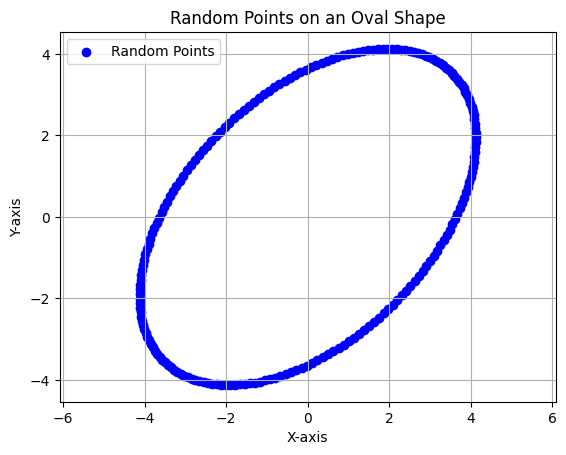

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Function to generate random points on an ellipse
def generate_rotated_oval_points(a, b, num_points, angle):
    t = np.linspace(0, 2 * np.pi, num_points)
    x = a * np.cos(t)
    y = b * np.sin(t)
    
    # Rotate the points
    x_rotated = x * np.cos(angle) - y * np.sin(angle)
    y_rotated = x * np.sin(angle) + y * np.cos(angle)
    
    return x_rotated.reshape(-1,1), y_rotated.reshape(-1,1)

# Set the parameters for the ellipse
a = 5  # Semi-major axis
b = 3  # Semi-minor axis
num_points = 200  # Number of points to generate

# Generate random points on the ellipse
x, y = generate_rotated_oval_points(a, b,num_points, angle=3.14/4)

# Plot the random points
plt.scatter(x, y, color='blue', label='Random Points')
plt.title('Random Points on an Oval Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')  # Ensure equal scaling of axes
plt.grid(True)
plt.show()


*Fantastic!*

Thank you scikit-learn!

* Now, I use a library from scikit to compute the OLS hyperplane:

In [3]:
from sklearn.linear_model import LinearRegression

ols=LinearRegression().fit(x,y)
y_pred=ols.predict(x)

* Here, I use PCA again from scikit to decompose (x,y) bivariation into two eigen vectors!

In [6]:
from sklearn.decomposition import PCA

data=np.hstack((x,y))
pca=PCA(n_components=2).fit(data)

comp1=pca.components_[0]*pca.explained_variance_[0]
comp2=pca.components_[1]*pca.explained_variance_[1]

comp1,comp2

(array([-8.9307769 , -8.92366791]), array([-3.18071331,  3.18324721]))

# The Final Act: Grand Expose'

* This plot showcases how the OLS hyperplane can diverge from egienvectors (ellipse's diamaters!) 

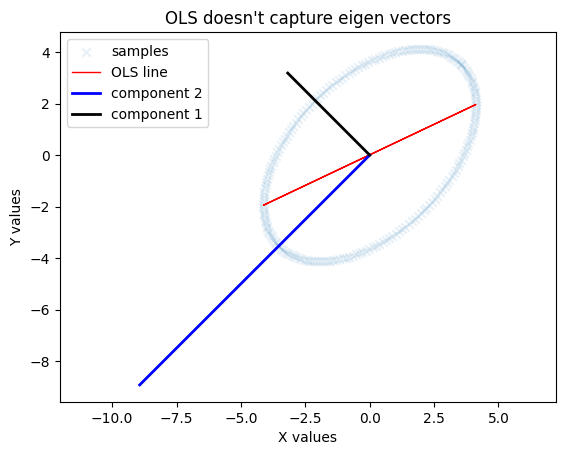

In [7]:
plt.scatter(x,y, alpha=0.1, label="samples",marker="x")
plt.plot(x,y_pred,color="red", linewidth=1,label="OLS line")

plt.plot(
    [0,comp1[0]],
    [0,comp1[1]],
    label="component 2",
    linewidth=2,
    color="blue"
)


plt.plot(
    [0,comp2[0]],
    [0,comp2[1]],
    label="component 1",
    linewidth=2,
    color="black",
)

plt.title("OLS doesn't capture eigen vectors")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.axis("equal")
plt.legend()
plt.show()

# Epilouge: your purpose defines you

* At first glance, this plot looks so counterintuitive!
* Most people expect the OLS line to cute the ellipse in half in a symmetric way! yet this is obviously not the case!
* What's going on then ?!
* Let's think about what each of these tools (eigen vectors, OLS) try to achieve
* **Eigen vectors**: They try to capture the highest variation between x & y.
* Component 1: is the hyperplane along which you can observe the highest variation between x and y
* OLS on the hand has another purpose: it tries to use information from x to explain y in the best way possible (subject to Gaus-Markov conditions)
* In a way, Principal Component Analysis and OLS complement each other!
* While one tries to shrink the dimensionality in the best linear way possible, the other tries to explain the dependent variable adhering to linear relationship between covariates and the dependant variable